In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("AirPassengers - AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<AxesSubplot:>

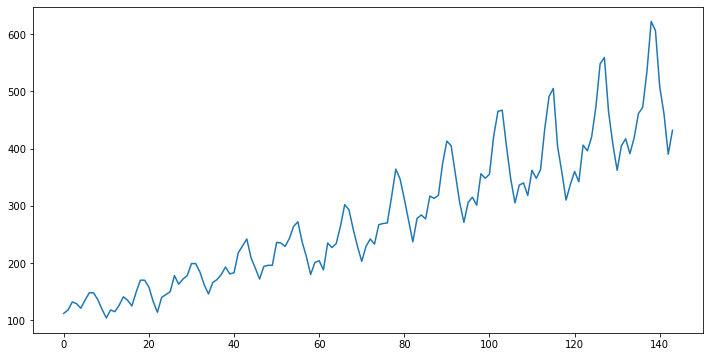

In [4]:
plt.rcParams.update({'figure.figsize' : (12,6)})
df['#Passengers'].plot()

# Moving Averages
- Simple Moving Averages(SMA)
- Cumulative Moving Averages(CMA)
- Exponential Moving Averages(EMA/EWMA)

# SMA / Rolling Mean

$$ SMA_t = \frac{x_t + x_{t-1}+x_{t-2}+...x{t-n}}{n}$$

In [13]:
df

,Month,#Passengers,SMA_30
0,1949-01,112,NaN
1,1949-02,118,NaN
2,1949-03,132,NaN
3,1949-04,129,NaN
4,1949-05,121,NaN
...,...,...,...
139,1960-08,606,432.566667
140,1960-09,508,437.433333
141,1960-10,461,441.200000
142,1960-11,390,442.100000


In [14]:
df['SMA_30']=df['#Passengers'].rolling(window=30).mean()

<AxesSubplot:>

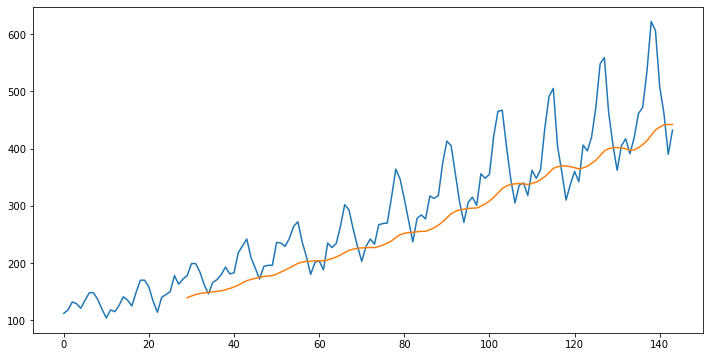

In [17]:
df['#Passengers'].plot()
df['SMA_30'].dropna().plot()

# Conclusion: #Passengers Columns has Uptrend/Increasing Trend(Pattern) 


# CMA

$$ CMA_t = \frac{x_1 + x_2 + ... + x_n} {n} $$

In [20]:
df['CMA'] = df['#Passengers'].expanding().mean()

In [21]:
df

,Month,#Passengers,SMA_30,CMA
0,1949-01,112,NaN,112.000000
1,1949-02,118,NaN,115.000000
2,1949-03,132,NaN,120.666667
3,1949-04,129,NaN,122.750000
4,1949-05,121,NaN,122.400000
...,...,...,...,...
139,1960-08,606,432.566667,275.514286
140,1960-09,508,437.433333,277.163121
141,1960-10,461,441.200000,278.457746
142,1960-11,390,442.100000,279.237762


<AxesSubplot:>

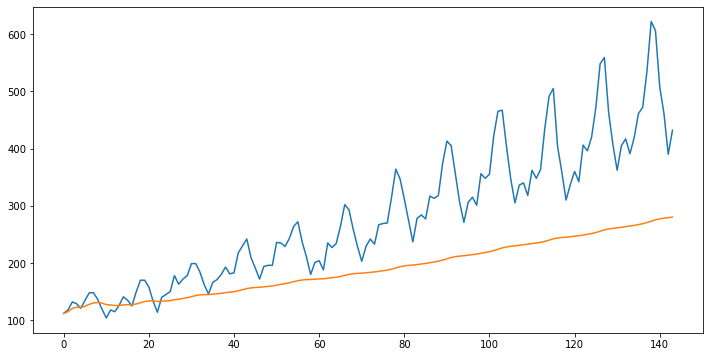

In [23]:
df['#Passengers'].plot()
df['CMA'].plot()

# EMA/EWMA

$$ EMA_t = \alpha * x_t + (1- \alpha) * EMA{t-1} $$

### alpha is the smoothing factor
### Range of alpha  between 0 to 1

In [52]:
df['EMA_0.1']=df['#Passengers'].ewm(alpha=0.1).mean()
df['EMA_0.3']=df['#Passengers'].ewm(alpha=0.3).mean()

In [53]:
df

,Month,#Passengers,SMA_30,CMA,EMA_t,EMA_0.1,EMA_0.3
0,1949-01,112,NaN,112.000000,112.000000,112.000000,112.000000
1,1949-02,118,NaN,115.000000,115.157895,115.157895,115.529412
2,1949-03,132,NaN,120.666667,121.372694,121.372694,123.050228
3,1949-04,129,NaN,122.750000,123.590579,123.590579,125.399131
4,1949-05,121,NaN,122.400000,122.957974,122.957974,123.812773
...,...,...,...,...,...,...,...
139,1960-08,606,432.566667,275.514286,468.874660,468.874660,542.383959
140,1960-09,508,437.433333,277.163121,472.787195,472.787195,532.068772
141,1960-10,461,441.200000,278.457746,471.608475,471.608475,510.748140
142,1960-11,390,442.100000,279.237762,463.447626,463.447626,474.523698


<AxesSubplot:>

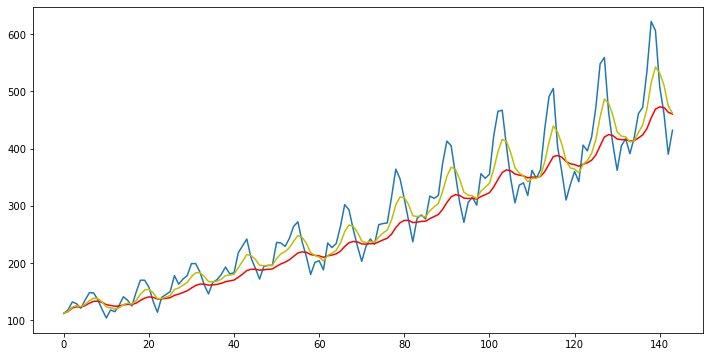

In [54]:
df['#Passengers'].plot()
df['EMA_0.1'].plot(color = 'r')
df['EMA_0.3'].plot(color = 'y')                 